In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from ffs_beta import FFS
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [2]:
x = np.linspace(-2,2,50)
y_cubic = x**3
fs_cubic = FFS(x,y_cubic,50)

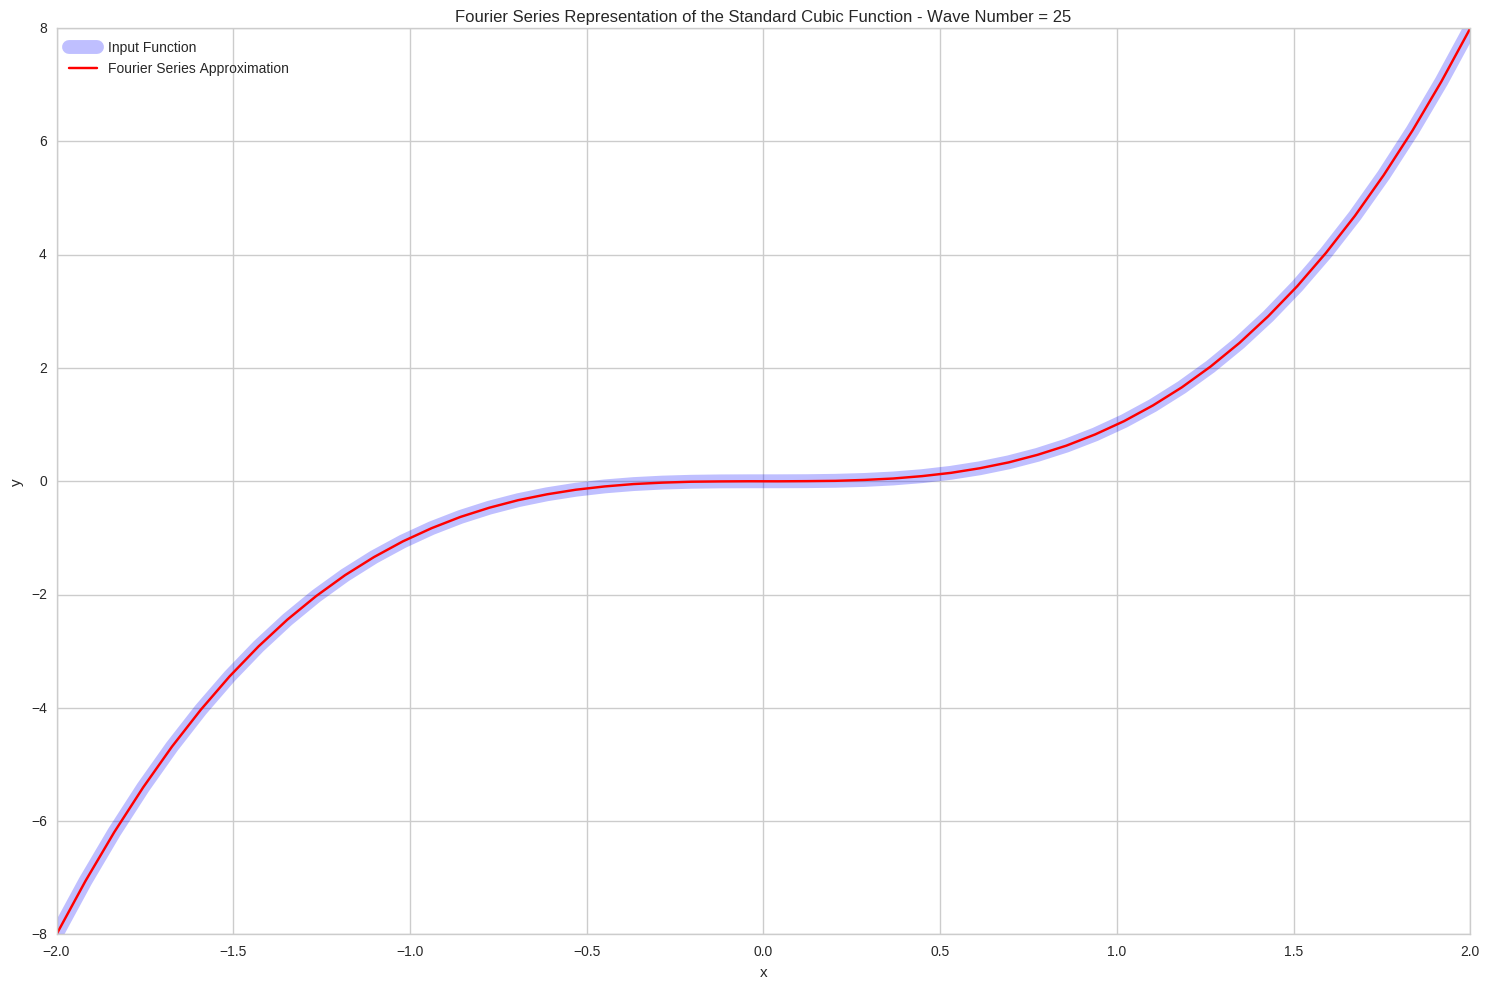

In [3]:
plt.figure(figsize=(15,10))
plt.plot(x,y_cubic,'b',linewidth=10, alpha = 0.25, label = 'Input Function')
plt.plot(x,fs_cubic.evaluate(x),'r', label = 'Fourier Series Approximation')
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim((-0.1, 1.1))
plt.title('Fourier Series Representation of the Standard Cubic Function - Wave Number = 25')
plt.legend(loc = 'upper left')
plt.tight_layout()

# plt.savefig('images/cubic.png')
plt.show()

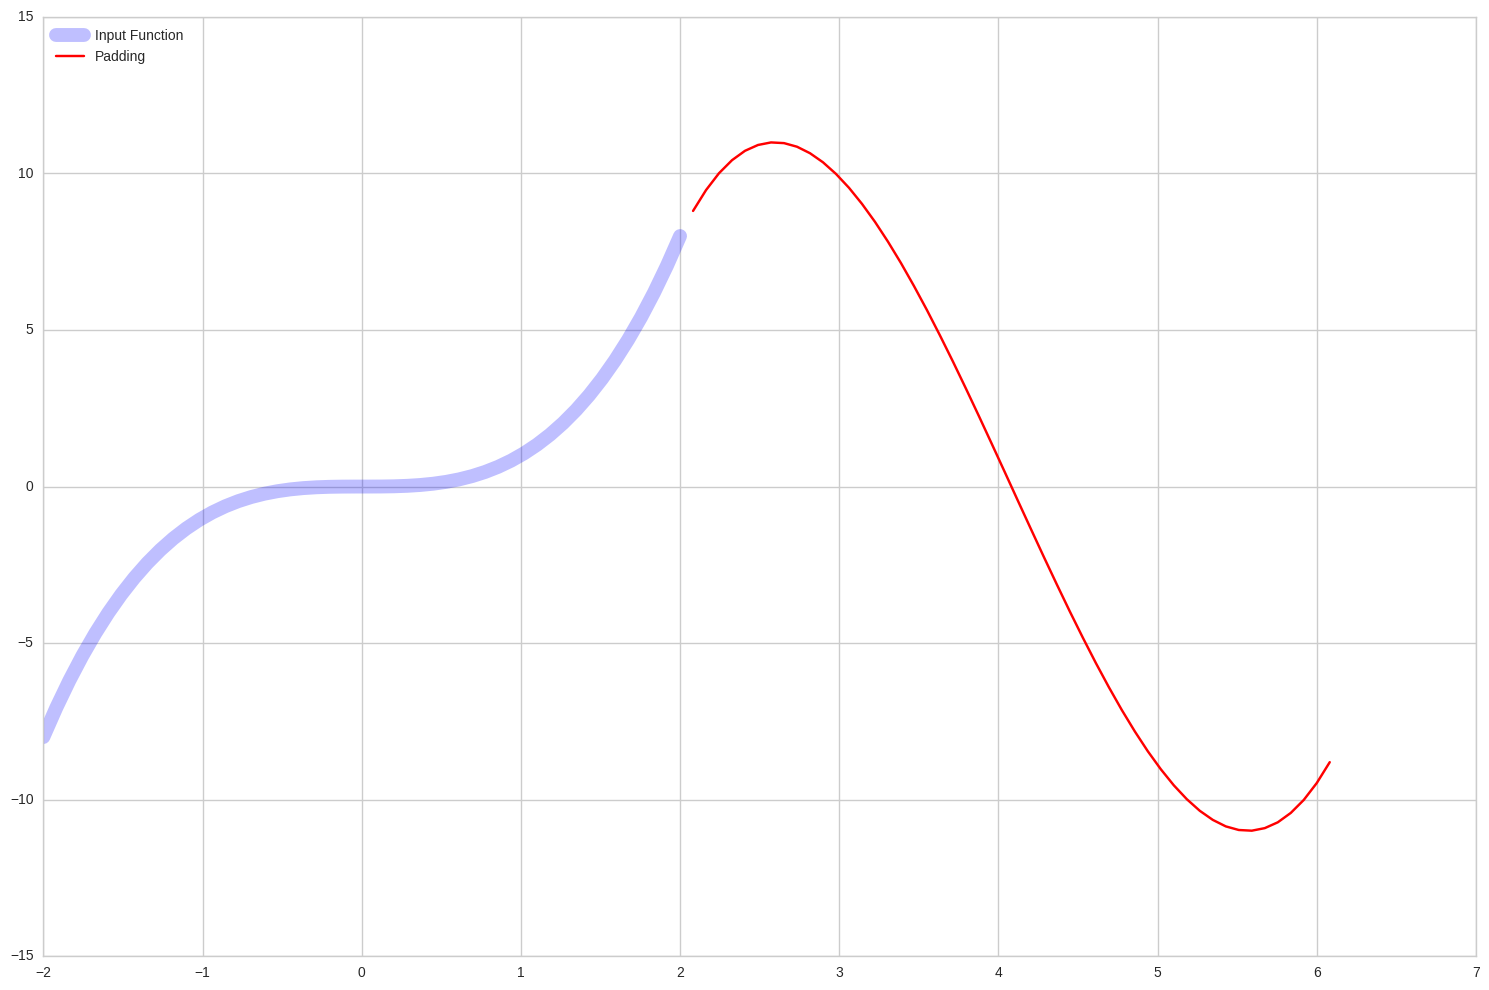

In [4]:
# xpad = np.hstack( (fs_cubic.x[49:], [fs_cubic.x[-1] + fs_cubic.h]) )
xpad = fs_cubic.x[50:]
ypad = fs_cubic.evaluate(xpad)

plt.figure(figsize=(15,10))
plt.plot(x, y_cubic, 'b', linewidth=10, alpha = 0.25, label = 'Input Function')
plt.plot(xpad, ypad, 'r', label = 'Padding')
# plt.plot(fs_cubic.x[-1] + fs_cubic.h, fs_cubic.evaluate(fs_cubic.x[-1] + fs_cubic.h), 'go')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [5]:
np.hstack( (np.arange(1,5), [5]) )

array([1, 2, 3, 4, 5])

In [52]:
x = np.arange(0,4)
# x = np.array([0,1,1.5,2,3])
y = np.array([0,4,3,5])
# y = np.array([0,4,3.5,3,5])

xx = np.linspace(0,3,100)

p1_1 = lambda xx: ((x[1] - xx)*y[0] + (xx - x[0])*y[1]) / (x[1] - x[0])
p2_1 = lambda xx: ((x[2] - xx)*y[1] + (xx - x[1])*y[2]) / (x[2] - x[1])
p3_1 = lambda xx: ((x[3] - xx)*y[2] + (xx - x[2])*y[3]) / (x[3] - x[2])

p1_2 = lambda xx: ((x[2] - xx)*p1_1(xx) + (xx - x[0])*p2_1(xx)) / (x[2] - x[0])


q1_1 = lambda xx: (1 - (xx - x[0])/(x[2] - x[0]))*y[0] + (xx - x[0])/(x[2] - x[0])*y[1]
q2_1 = lambda xx: (1 - (xx - x[0])/(x[2] - x[0]))*y[1] + (xx - x[0])/(x[2] - x[0])*y[2]
q3_1 = lambda xx: (1 - (xx - x[1])/(x[3] - x[1]))*y[1] + (xx - x[0])/(x[2] - x[0])*y[2]

q1_2 = lambda xx: (1 - (xx - x[0])/(x[2] - x[0]))*q1_1(xx) + (xx - x[0])/(x[2] - x[0])*q2_1(xx)

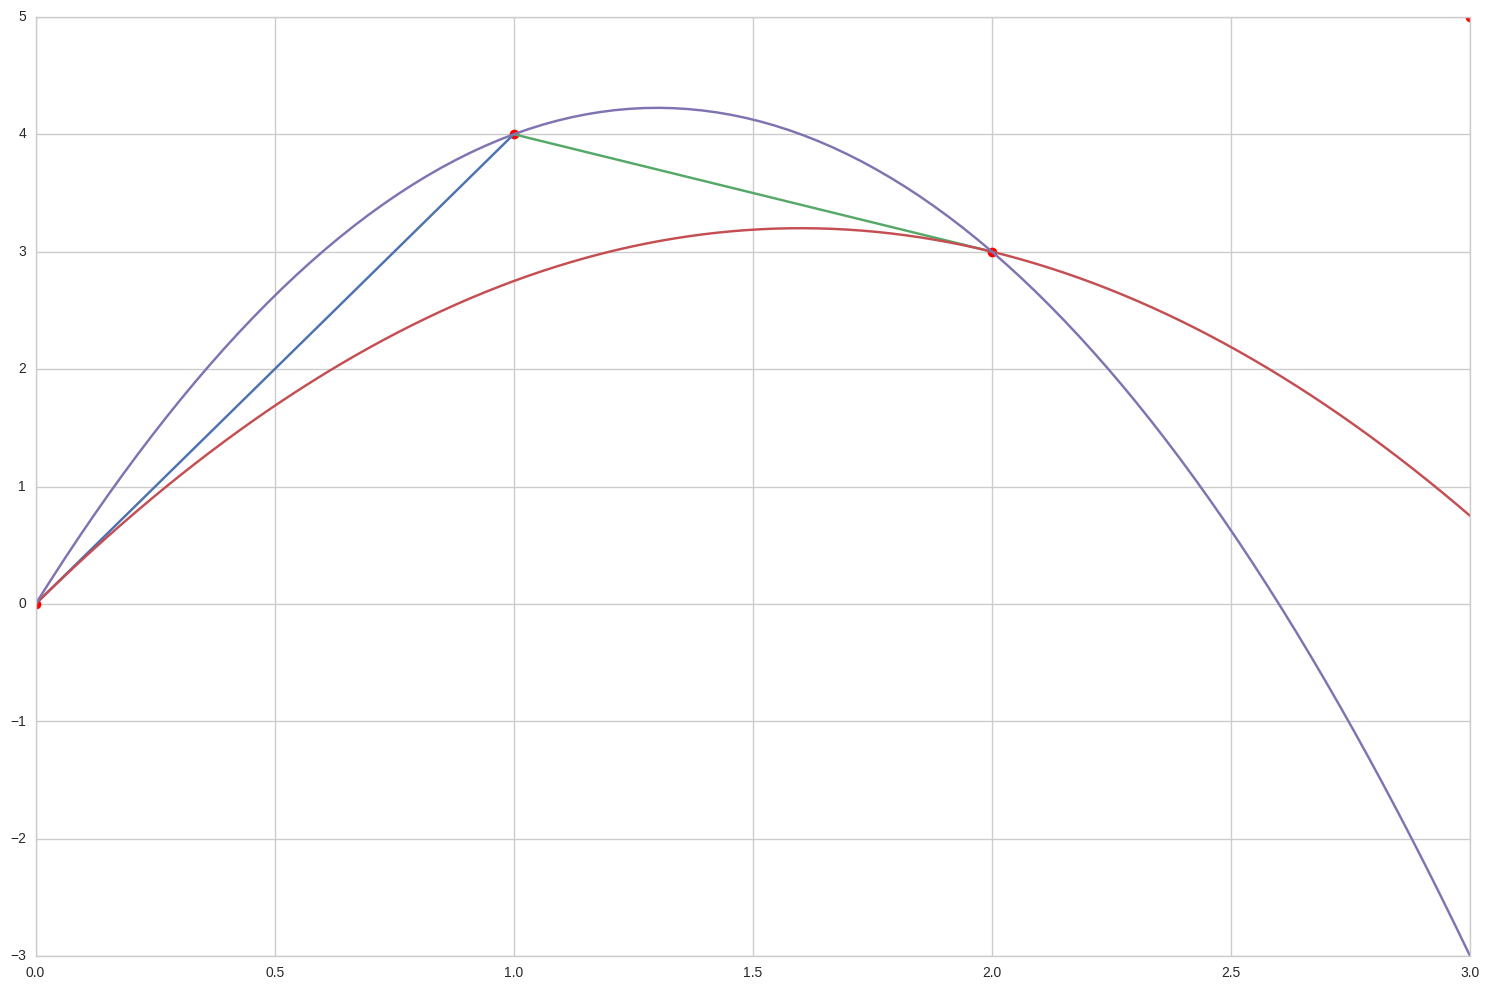

In [53]:

plt.figure(figsize=(15,10))
plt.plot(x,y,'ro')
plt.plot(x[:2], p1_1(x[:2]))
plt.plot(x[1:3], p2_1(x[1:3]))
# plt.plot(x[2:], p3_1(x[2:]))

plt.plot(xx, q1_2(xx))
plt.plot(xx, p1_2(xx))


plt.tight_layout()
plt.show()